In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')  # 윈도우의 경우
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')   # MacOS의 경우
else:
    rc('font', family='NanumGothic')   # 리눅스의 경우

# 데이터 파일 경로 설정
file_path = './data/쇼핑몰이탈정제.csv'  # 데이터 파일의 경로를 지정하세요.
data = pd.read_csv(file_path)


In [5]:
df=data

In [6]:
# '도시 등급'을 범주형 데이터로 변경
df['도시 등급'] = df['도시 등급'].astype('category')

df['고객 ID'] = range(1, len(df) + 1)

# 데이터 타입 변경
df['가입 기간'] = df['가입 기간'].astype('int8')  # int8로 변경
df['배송거리'] = df['배송거리'].astype('int8')  # int8로 변경
df['앱 사용 시간'] = df['앱 사용 시간'].astype('int8')  # int8로 변경
df['기기 수'] = df['기기 수'].astype('int8')  # int8로 변경
df['만족도'] = df['만족도'].astype('int8')  # int8로 변경
df['주소 수'] = df['주소 수'].astype('int8')  # int8로 변경
df['불만족 여부'] = df['불만족 여부'].astype('int8')  # int8로 변경
df['주문 증가율'] = df['주문 증가율'].astype('int8')  # int8로 변경
df['쿠폰 수'] = df['쿠폰 수'].astype('int8')  # int8로 변경
df['주문 횟수'] = df['주문 횟수'].astype('int8')  # int8로 변경
df['경과일'] = df['경과일'].astype('int8')  # int8로 변경
df['이탈 여부'] = df['이탈 여부'].astype('int8')  # int8으로 변경
df['고객 ID'] = df['고객 ID'].astype('int16')  # int16으로 변경
df['캐시백 금액'] = df['캐시백 금액'].astype('int16')  # int16으로 변경

# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   고객 ID    5379 non-null   int16   
 1   이탈 여부    5379 non-null   int8    
 2   가입 기간    5379 non-null   int8    
 3   접속 기기    5379 non-null   object  
 4   도시 등급    5379 non-null   category
 5   배송거리     5379 non-null   int8    
 6   결제 방식    5379 non-null   object  
 7   성별       5379 non-null   object  
 8   앱 사용 시간  5379 non-null   int8    
 9   기기 수     5379 non-null   int8    
 10  주문 카테고리  5379 non-null   object  
 11  만족도      5379 non-null   int8    
 12  결혼 여부    5379 non-null   object  
 13  주소 수     5379 non-null   int8    
 14  불만족 여부   5379 non-null   int8    
 15  주문 증가율   5379 non-null   int8    
 16  쿠폰 수     5379 non-null   int8    
 17  주문 횟수    5379 non-null   int8    
 18  경과일      5379 non-null   int8    
 19  캐시백 금액   5379 non-null   int16   
dtypes: category(1), int16(2), int8

# XGBoost

In [11]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   --- ------------------------------------ 9.7/124.9 MB 50.5 MB/s eta 0:00:03
   ----- ---------------------------------- 17.8/124.9 MB 43.3 MB/s eta 0:00:03
   --------- ------------------------------ 28.6/124.9 MB 45.3 MB/s eta 0:00:03
   ------------ --------------------------- 38.5/124.9 MB 45.3 MB/s eta 0:00:02
   -------------- ------------------------- 46.4/124.9 MB 44.1 MB/s eta 0:00:02
   --------------- ------------------------ 48.5/124.9 MB 37.7 MB/s eta 0:00:03
   ------------------ --------------------- 58.5/124.9 MB 39.2 MB/s eta 0:00:02
   --------------------- ------------------ 67.4/124.9 MB 39.4 MB/s eta 0:00:02
   ------------------------ --------------- 76.3/124.9 MB 39.6 MB/s eta 0:00:02
   --------------------------- ------------ 84.4/124.9 MB 39.6 MB/s eta 0:00:02
   ----------------------------- ---------- 92.0/124.9 MB 39.4 MB/s eta 0:00:01
   ------------------------------- -------- 99.9/1

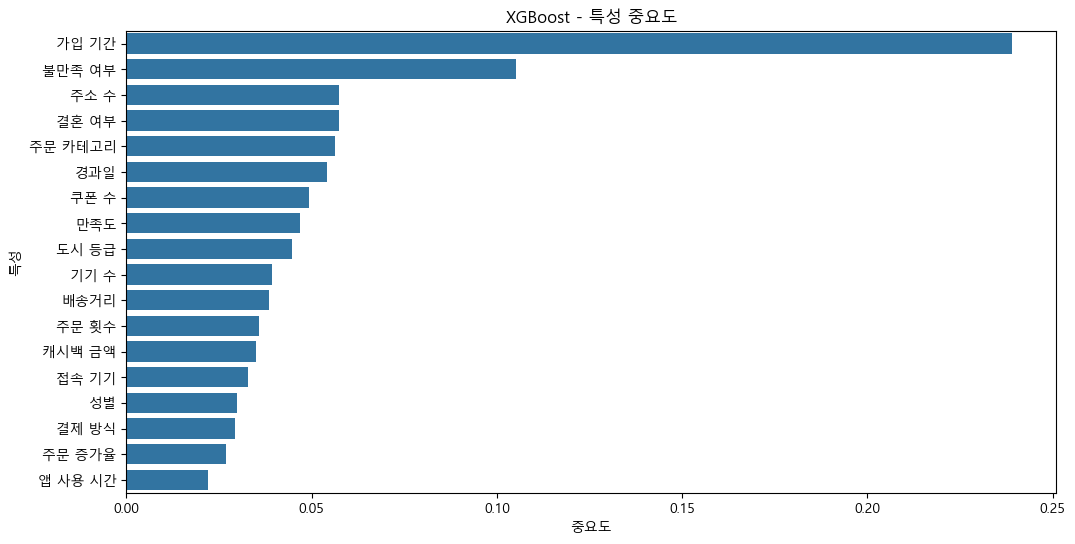

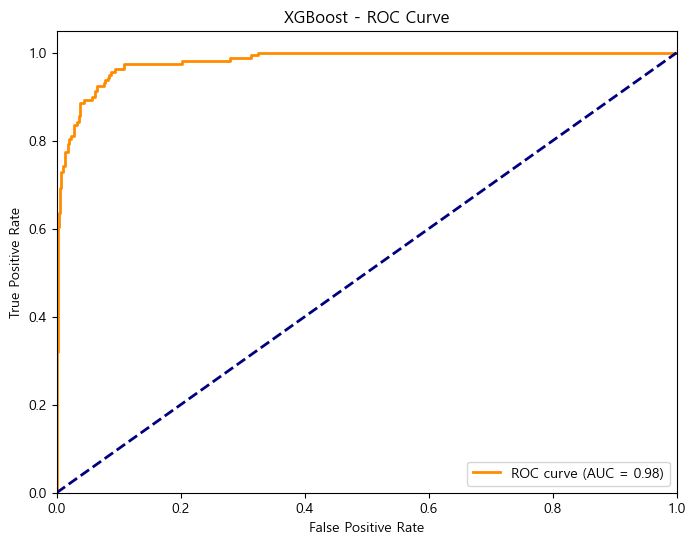

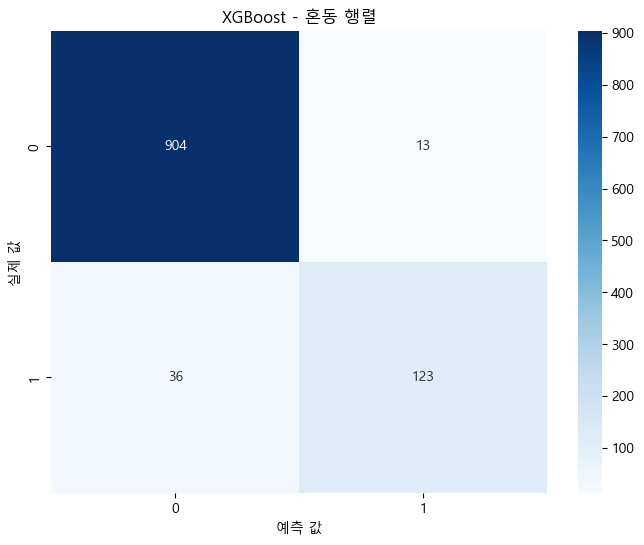


XGBoost 분류 보고서:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       917
           1       0.90      0.77      0.83       159

    accuracy                           0.95      1076
   macro avg       0.93      0.88      0.90      1076
weighted avg       0.95      0.95      0.95      1076



In [12]:
# 필요한 라이브러리 임포트
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# 이미 전처리된 X, y 데이터 사용
# 학습용과 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성 및 학습
xgb_model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# 특성 중요도 시각화
feature_importance = pd.DataFrame({
    '특성': X.columns,
    '중요도': xgb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('중요도', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='중요도', y='특성', data=feature_importance)
plt.title('XGBoost - 특성 중요도')
plt.show()

# ROC 곡선 시각화
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost - 혼동 행렬')
plt.ylabel('실제 값')
plt.xlabel('예측 값')
plt.show()

# 모델 성능 출력
print('\nXGBoost 분류 보고서:')
print(classification_report(y_test, y_pred))

# LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 705, number of negative: 3598
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 4303, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163839 -> initscore=-1.629936
[LightGBM] [Info] Start training from score -1.629936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

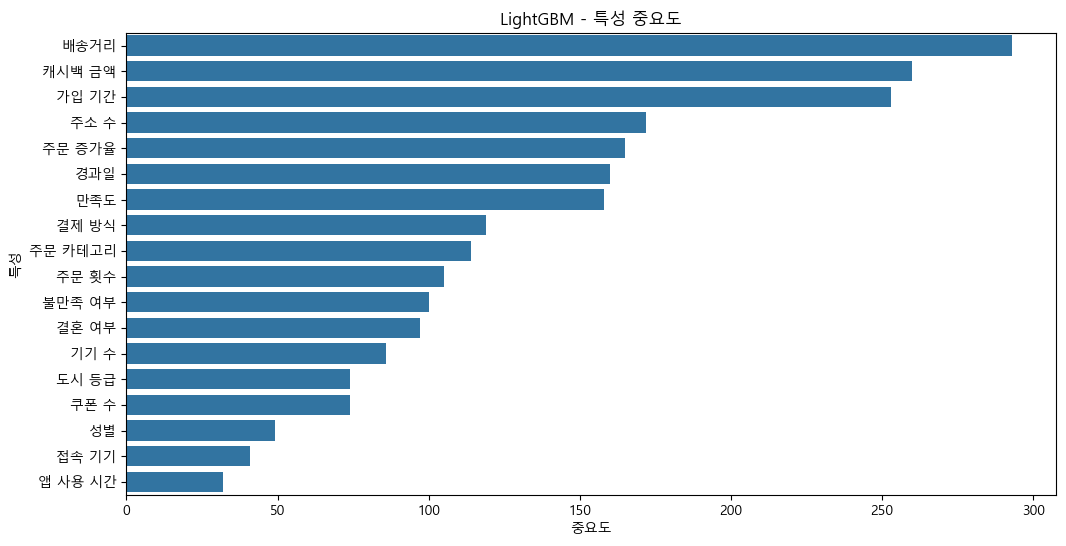

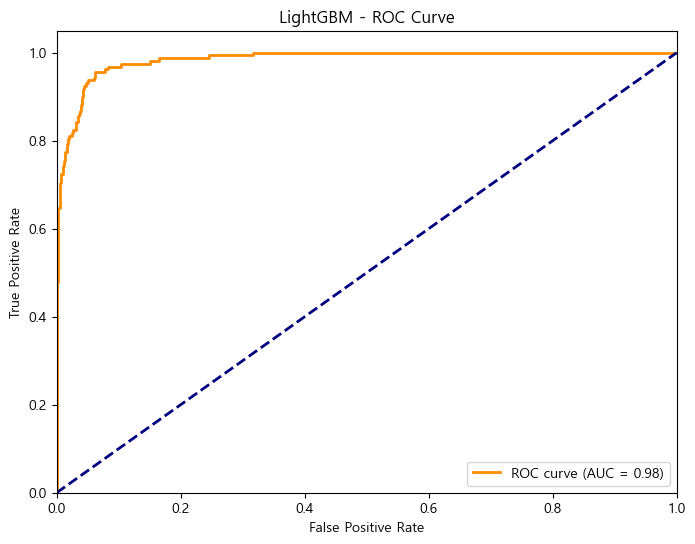

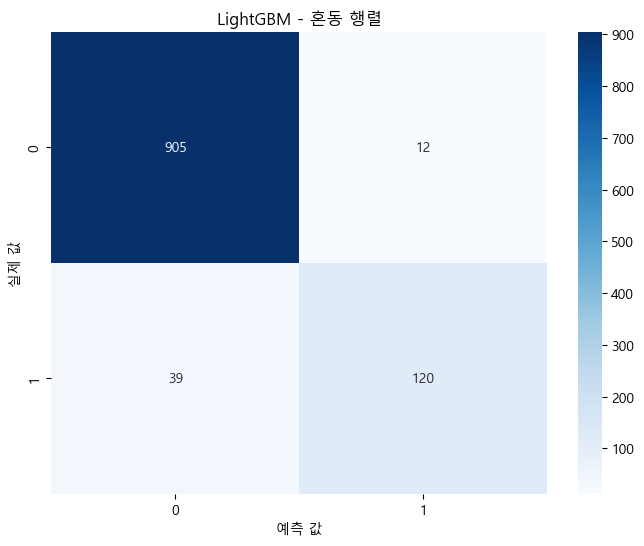


LightGBM 분류 보고서:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       917
           1       0.91      0.75      0.82       159

    accuracy                           0.95      1076
   macro avg       0.93      0.87      0.90      1076
weighted avg       0.95      0.95      0.95      1076



In [13]:
# LightGBM
!pip install lightgbm

# 필요한 라이브러리 임포트
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# LightGBM 모델 생성 및 학습
lgb_model = lgb.LGBMClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# 예측
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# 특성 중요도 시각화
feature_importance = pd.DataFrame({
    '특성': X.columns,
    '중요도': lgb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('중요도', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='중요도', y='특성', data=feature_importance)
plt.title('LightGBM - 특성 중요도')
plt.show()

# ROC 곡선 시각화
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('LightGBM - 혼동 행렬')
plt.ylabel('실제 값')
plt.xlabel('예측 값')
plt.show()

# 모델 성능 출력
print('\nLightGBM 분류 보고서:')
print(classification_report(y_test, y_pred))

# Gradient Boosting


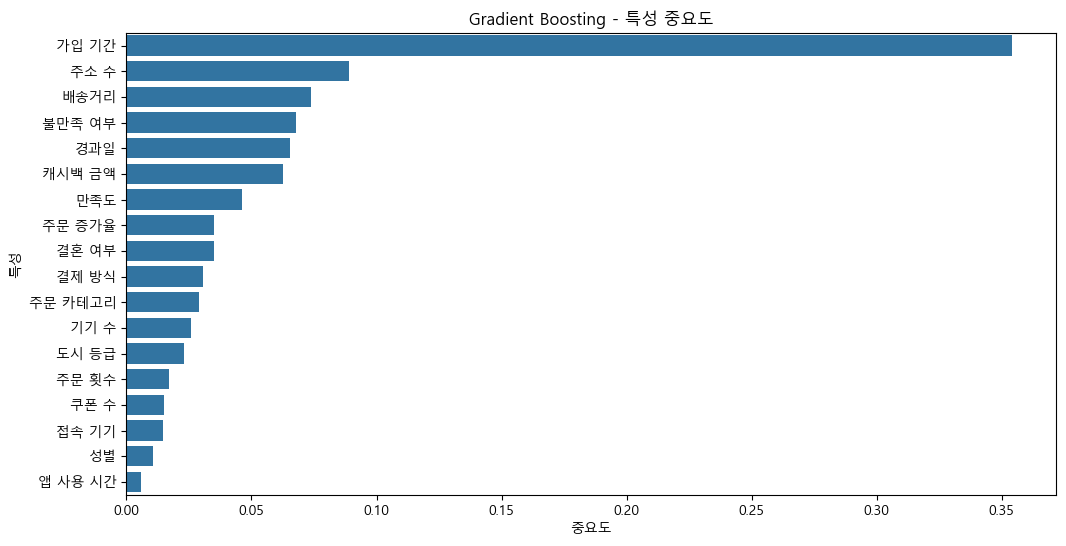

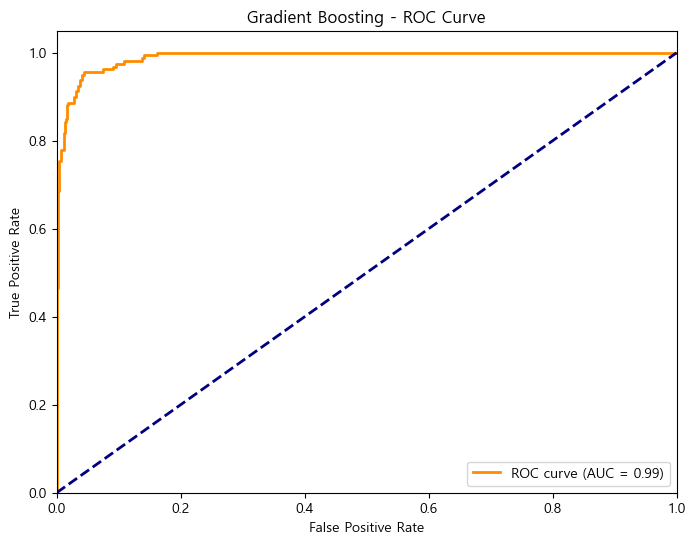

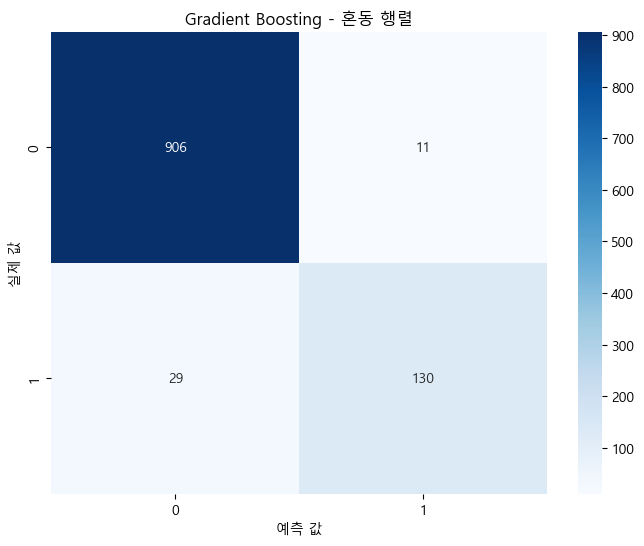


Gradient Boosting 분류 보고서:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       917
           1       0.92      0.82      0.87       159

    accuracy                           0.96      1076
   macro avg       0.95      0.90      0.92      1076
weighted avg       0.96      0.96      0.96      1076



In [14]:
# 필요한 라이브러리 임포트
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Gradient Boosting 모델 생성 및 학습
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb_model.fit(X_train, y_train)

# 예측
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# 특성 중요도 시각화
feature_importance = pd.DataFrame({
    '특성': X.columns,
    '중요도': gb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('중요도', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='중요도', y='특성', data=feature_importance)
plt.title('Gradient Boosting - 특성 중요도')
plt.show()

# ROC 곡선 시각화
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting - 혼동 행렬')
plt.ylabel('실제 값')
plt.xlabel('예측 값')
plt.show()

# 모델 성능 출력
print('\nGradient Boosting 분류 보고서:')
print(classification_report(y_test, y_pred))

# 랜덤 포레스트

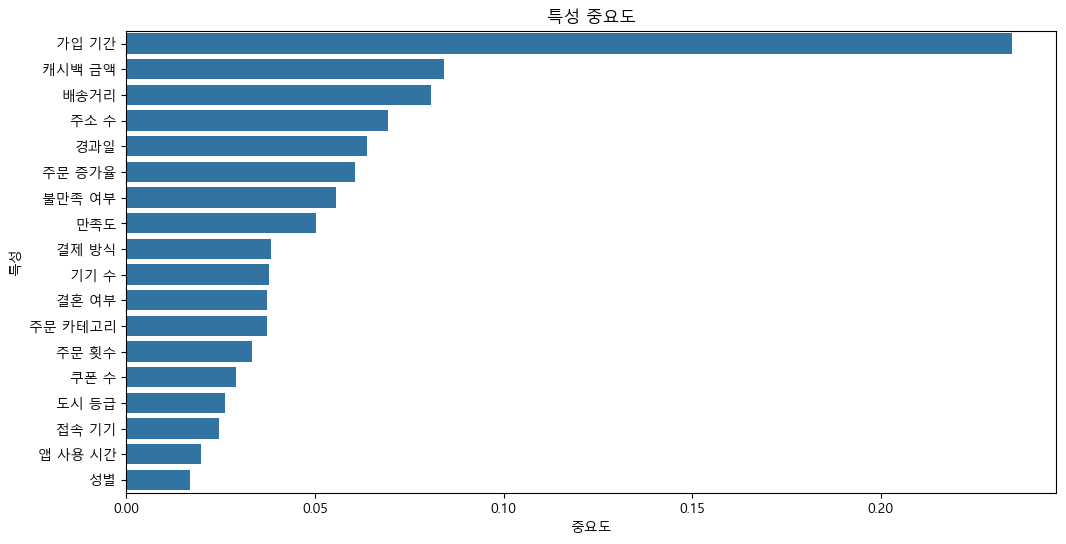

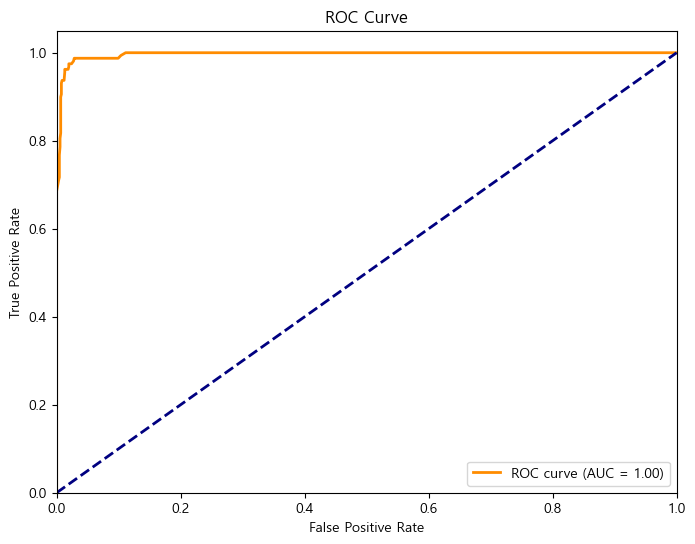

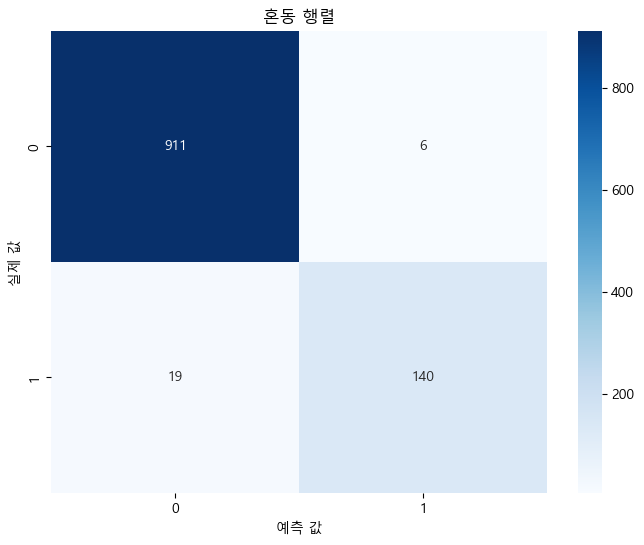


분류 보고서:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       917
           1       0.96      0.88      0.92       159

    accuracy                           0.98      1076
   macro avg       0.97      0.94      0.95      1076
weighted avg       0.98      0.98      0.98      1076



In [9]:
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 범주형 변수 인코딩
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# 특성(X)과 타겟(y) 분리
X = df.drop(['이탈 여부', '고객 ID'], axis=1)
y = df['이탈 여부']

# 학습용과 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# 특성 중요도 시각화
feature_importance = pd.DataFrame({
    '특성': X.columns,
    '중요도': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('중요도', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='중요도', y='특성', data=feature_importance)
plt.title('특성 중요도')
plt.show()

# ROC 곡선 시각화
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('혼동 행렬')
plt.ylabel('실제 값')
plt.xlabel('예측 값')
plt.show()

# 모델 성능 출력
print('\n분류 보고서:')
print(classification_report(y_test, y_pred))

# VotingClassifier를 사용하여 soft voting 방식의 앙상블 모델

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 705, number of negative: 3598
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 4303, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163839 -> initscore=-1.629936
[LightGBM] [Info] Start training from score -1.629936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

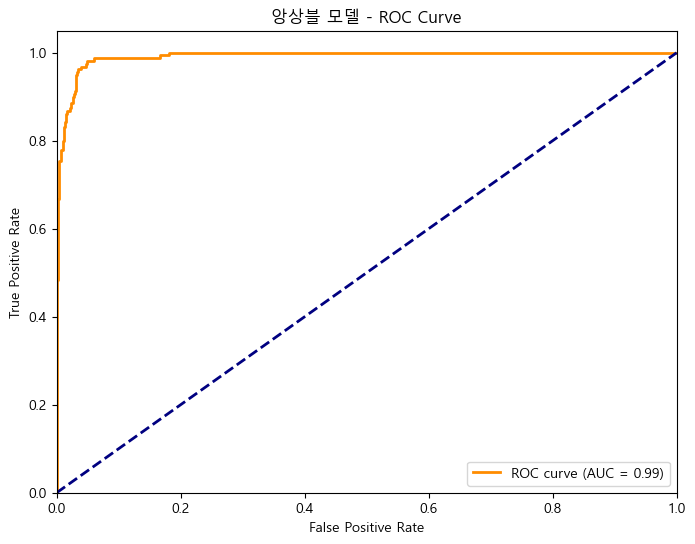

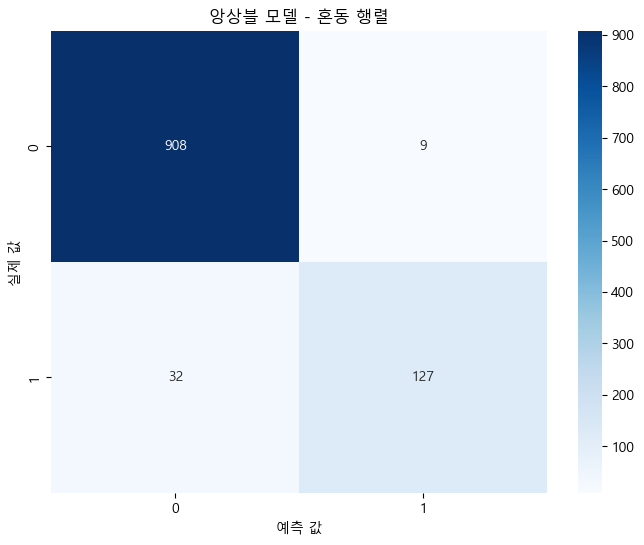


앙상블 모델 분류 보고서:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       917
           1       0.93      0.80      0.86       159

    accuracy                           0.96      1076
   macro avg       0.95      0.89      0.92      1076
weighted avg       0.96      0.96      0.96      1076



In [15]:
# 앙상블 모델 생성
from sklearn.ensemble import VotingClassifier

# 개별 모델 정의
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, random_state=42)
lgb_model = lgb.LGBMClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 보팅 분류기 생성 (soft voting 사용)
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('gb', gb_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

# 앙상블 모델 학습
ensemble_model.fit(X_train, y_train)

# 예측
y_pred = ensemble_model.predict(X_test)
y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]

# ROC 곡선 시각화
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('앙상블 모델 - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('앙상블 모델 - 혼동 행렬')
plt.ylabel('실제 값')
plt.xlabel('예측 값')
plt.show()

# 모델 성능 출력
print('\n앙상블 모델 분류 보고서:')
print(classification_report(y_test, y_pred))

# 모든 모델의 성능 평가 및 비교
   - 각 모델에 대해 Accuracy, Precision, Recall, F1 Score, AUC-ROC 점수를 계산합니다.
   - 각 평가 지표별로 순위를 매깁니다.
   - 평균 순위를 계산하여 최종 순위를 결정합니다.
   - 전체 성능 지표와 순위별 상세 결과를 출력합니다.
   - 모든 모델의 성능을 비교하는 막대 그래프를 생성합니다.

Ensemble 모델 학습 중...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 705, number of negative: 3598
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 4303, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163839 -> initscore=-1.629936
[LightGBM] [Info] Start training from score -1.629936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

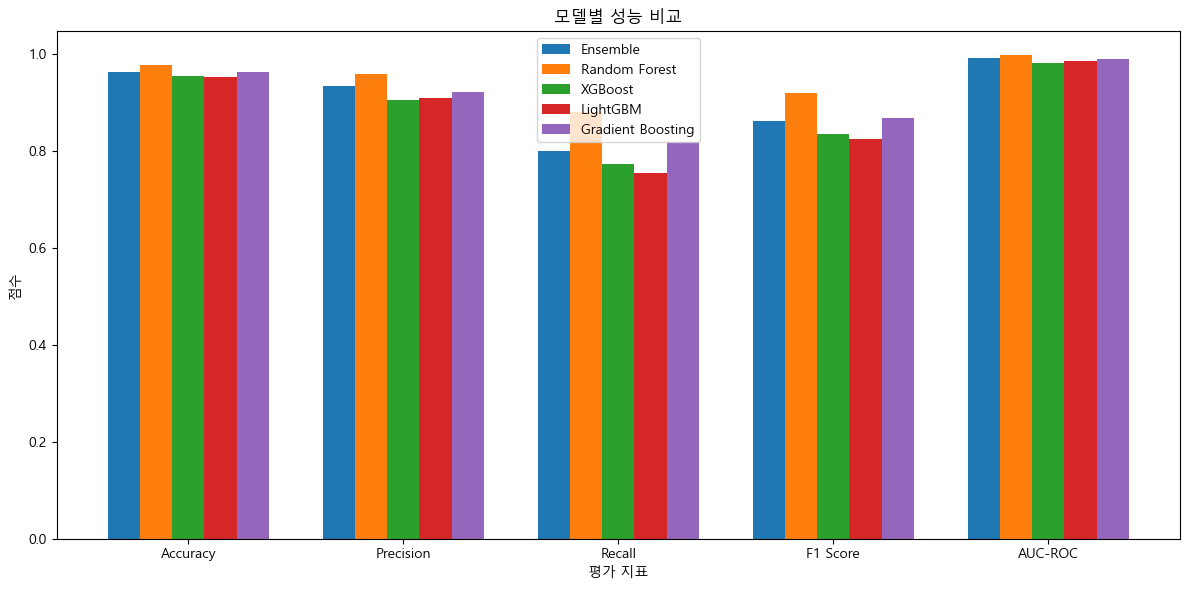

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 모델 평가 함수
def evaluate_model(model, X_test, y_test, model_name):
    # 모델이 학습되었는지 확인
    try:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    except Exception as e:
        print(f"{model_name} 모델이 학습되지 않았습니다. 먼저 fit()을 호출해주세요. 오류: {e}")
        return None

    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_pred_proba)
    }

# 모델 학습 및 평가
models = {
    'Ensemble': ensemble_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model,
    'Gradient Boosting': gb_model
}

# 학습 데이터와 테스트 데이터 준비 (예제, 실제 데이터 사용 시 교체 필요)
# X_train, X_test, y_train, y_test를 정의해야 함
# 예시:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모든 모델 학습
for name, model in models.items():
    try:
        print(f"{name} 모델 학습 중...")
        model.fit(X_train, y_train)
        print(f"{name} 모델 학습 완료.")
    except Exception as e:
        print(f"{name} 모델 학습 중 오류 발생: {e}")

# 학습된 모델 평가
results = []
for name, model in models.items():
    result = evaluate_model(model, X_test, y_test, name)
    if result is not None:
        results.append(result)

# 결과 데이터프레임 생성 및 분석
if len(results) > 0:
    results_df = pd.DataFrame(results)

    # 각 지표별 순위 계산
    for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']:
        results_df[f'{metric} Rank'] = results_df[metric].rank(ascending=False)

    # 평균 순위 계산
    rank_columns = [col for col in results_df.columns if 'Rank' in col]
    results_df['Average Rank'] = results_df[rank_columns].mean(axis=1)

    # 최종 순위순으로 정렬
    final_results = results_df.sort_values('Average Rank')

    # 결과 출력
    print("\n=== 모델 성능 비교 ===")
    print("\n1. 전체 성능 지표")
    print(results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']].to_string(index=False))

    print("\n2. 최종 순위 (평균 순위 기준)")
    for idx, row in final_results.iterrows():
        print(f"\n{int(row['Average Rank'])}위: {row['Model']}")
        print(f"   Accuracy: {row['Accuracy']:.4f}")
        print(f"   Precision: {row['Precision']:.4f}")
        print(f"   Recall: {row['Recall']:.4f}")
        print(f"   F1 Score: {row['F1 Score']:.4f}")
        print(f"   AUC-ROC: {row['AUC-ROC']:.4f}")

    # 시각화
    plt.figure(figsize=(12, 6))
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
    bar_width = 0.15
    index = np.arange(len(metrics))

    for i, (name, model) in enumerate(models.items()):
        if name in results_df['Model'].values:
            values = [results_df[results_df['Model'] == name][metric].iloc[0] for metric in metrics]
            plt.bar(index + i * bar_width, values, bar_width, label=name)

    plt.xlabel('평가 지표')
    plt.ylabel('점수')
    plt.title('모델별 성능 비교')
    plt.xticks(index + bar_width * 2, metrics)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("학습된 모델이 없습니다. 모든 모델을 먼저 학습시켜주세요.")


# 분석 결과

1. 전반적인 성능 순위
   - Random Forest가 대부분의 지표에서 가장 좋은 성능을 보여줍니다
   - Ensemble 모델이 그 다음으로 좋은 성능을 보입니다
   - XGBoost, LightGBM, Gradient Boosting은 비슷한 수준의 성능을 보입니다
2. 주요 지표별 분석
   - Accuracy (정확도)
      - 모든 모델이 95% 이상의 높은 정확도를 보임
      - Random Forest가 근소하게 가장 높음
   - Precision (정밀도)
      - Random Forest가 가장 높은 정밀도를 보임
      - 다른 모델들도 90% 이상의 양호한 정밀도를 보임
   - Recall (재현율)
      - Random Forest가 가장 높은 재현율을 보임
      - 다른 모델들은 75-80% 정도의 재현율을 보임
   - F1 Score
      - Random Forest가 가장 높은 F1 점수를 기록
      - Ensemble 모델이 그 다음으로 좋은 성능을 보임
   - AUC-ROC
      - 모든 모델이 0.95 이상의 매우 높은 AUC-ROC 점수를 기록
      - 모델들 간의 차이가 매우 작음
3. 결론
   - Random Forest가 전반적으로 가장 안정적이고 좋은 성능을 보여줍니다
   - Ensemble 모델이 두 번째로 좋은 성능을 보여주며, 개별 모델들의 장점을 잘 결합했습니다
   - 모든 모델이 전반적으로 양호한 성능을 보여주어, 이탈 예측에 적합한 것으로 판단됩니다